Python 으로 URL 분석

In [40]:
import urllib.parse

In [41]:
p = urllib.parse.urlparse('https://www.nature.com/articles/d41586-020-00740-y')

In [42]:
p.scheme

'https'

In [43]:
p.hostname

'www.nature.com'

In [44]:
p.path

'/articles/d41586-020-00740-y'

In [45]:
p.query

''

# 요청보내기

In [46]:
import requests

In [28]:
# GET 요청을 보내고 응답을 받아와 res 변수에 할당한다.
url = 'https://www.statista.com/topics/6082/coronavirus-covid-19-in-south-korea/#dossierSummary__chapter2'
res = requests.get(url)

In [29]:
res

<Response [200]>

In [30]:
res.status_code
# 응답의 상태 코드를 확인하면 200번을 얻는다.

200

# 워드클라우드 

In [101]:
import pandas as pd
import lxml.html
import requests

In [ ]:
#https://www.nature.com/articles/d41586-020-00740-y

In [83]:
res = requests.get('https://www.nature.com/articles/d41586-020-00740-y')

In [84]:
root = lxml.html.fromstring(res.text)

In [85]:
root

<Element html at 0x1fcf0934f48>

In [86]:
root.cssselect('[itemProp="articleBody"]')[0]

<Element div at 0x1fcf09d0f48>

In [87]:
content = root.cssselect('[itemProp="articleBody"]')[0].text_content()

In [88]:
content

"\n        \n            \n                NEWS\n                    \n                        18 March 2020\n                    \n                \n                \n                \n                South Korea is reporting intimate details of COVID-19 cases: has it helped? \n                \n                \n                    Extensive contact tracing has slowed viral spread, but some say publicizing people’s movements raises privacy concerns.\n                \n            \n\n            \n            \n                \n                    \n    \n        \n            \n                \n                    Mark Zastrow\n                \n                \n                    \n                        \n                            \n                                \n                                    \n                                        Search for this author in:\n                                        \n                                            Pub Med\n          

In [89]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')

In [90]:
tdm = cv.fit_transform([content]).toarray()

In [91]:
tdm

array([[ 2,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  5,  7,  2,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         2,  1,  2,  1,  1,  1,  1,  1,  1,  1,  6,  1,  1,  1,  1,  4,
         1,  1,  3,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  7,
         1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,
         1,  2,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  2,  1,  1,  1,
         5,  1,  1,  1,  1,  1, 11,  1,  5,  5,  2,  1,  1,  1,  2,  6,
         1,  1,  1,  1,  5,  2,  1,  1,  1,  1,  3,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  3,  2,
         1,  1,  1,  1,  1,  1,  1,  1,  3,  2,  1,  2,  1,  1,  1,  1,
         1,  2,  1,  1,  1,  8,  1,  1,  1,  1,  1,  1,  2,  2,  2,  1,
         2,  2,  3,  1,  1,  1,  1,  3,  1,  1,  1,  1,  2,  1,  1,  1,
        12,  2,  1,  1, 11,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
         1,  1,  1,  1,  9,  2,  1,  1,  1,  1,  1,  1,  1,  1, 

In [92]:
df = pd.DataFrame({
    'word': cv.get_feature_names(),
    'freq': tdm.flat
})

In [93]:
df

,word,freq
0,000,2
1,00740,1
2,020,1
3,10,2
4,1038,1
...,...,...
430,yeon,1
431,yes,1
432,young,1
433,youngkee,1


In [94]:
df.sort_values('freq', ascending=False).head(20)

,word,freq
283,people,21
192,infected,12
196,information,11
102,coronavirus,11
362,south,10
341,says,9
212,korea,9
165,government,8
285,person,8
301,public,8


In [95]:
from wordcloud import WordCloud

In [96]:
wc = WordCloud(width=400, height=400, background_color='white')
#wc = WordCloud(font_path='C:\Windows\Fonts\malgun.ttf', width=400, height=400, background_color='white')
# 한글 파일일 경우 폰트 지정할 것.

In [97]:
frequencies = {word: freq for word, freq in zip(cv.get_feature_names(), tdm.flat)}
# dictionery 형태로 변경

In [98]:
wc.fit_words(frequencies)

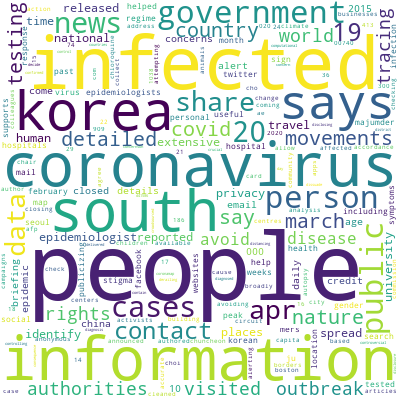

In [99]:
wc.to_image()

In [102]:
import numpy as np

In [103]:
twitter_mask = np.array(Image.open("twitter_mask.png"))
twitter_mask

array([[[  2,   2,   2, 110],
        [180, 180, 180, 238],
        [253, 253, 253, 255],
        ...,
        [250, 250, 250, 255],
        [158, 158, 158, 233],
        [  2,   2,   2, 110]],

       [[180, 180, 180, 238],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [158, 158, 158, 233]],

       [[253, 253, 253, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [250, 250, 250, 255]],

       ...,

       [[250, 250, 250, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [250, 250, 250, 255]],

       [[158, 158, 158, 233],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [158, 158, 158, 233]],

       [[  2

In [113]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
wine_mask = np.array(Image.open("wine_mask.png"))
wine_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [117]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [118]:
# Transform your mask into a new one that will work with the function:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

In [119]:
# Check the expected result of your mask
transformed_wine_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

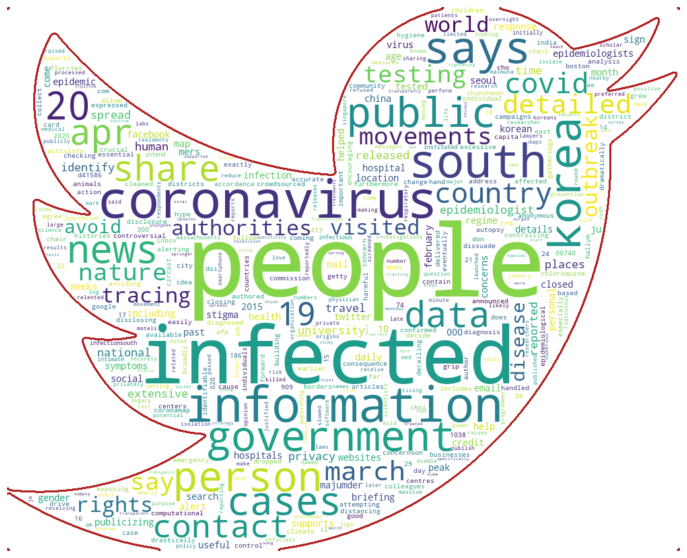

In [129]:
wc = WordCloud(background_color="white", max_words=1000, mask=twitter_mask,
                contour_width=3, contour_color='firebrick')
frequencies = {word: freq for word, freq in zip(cv.get_feature_names(), tdm.flat)}
# dictionery 형태로 변경
wc.fit_words(frequencies)
wc.to_file("twitter_mask.png")
# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

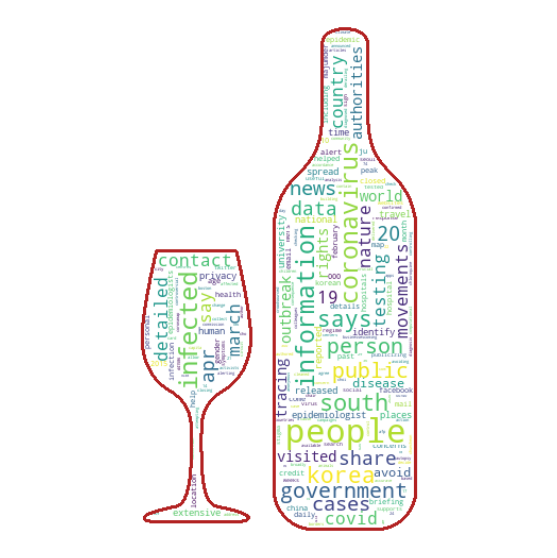

In [130]:
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask,
                contour_width=3, contour_color='firebrick')
frequencies = {word: freq for word, freq in zip(cv.get_feature_names(), tdm.flat)}
# dictionery 형태로 변경
wc.fit_words(frequencies)
wc.to_file("wine.png")
# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()